In [1]:
#******************PROBLEM 1****************************
#<-----------------PART-1- SUPERBOWL------------------->
#<-----------------PART-2- GENERALIZED CASE (with search variable)------------>
#NOTE: DATA collection in csv format has been commented out

In [2]:
#<-----------------PART-1- SUPERBOWL------------------->
#Nation's reaction to SuperBowl

library('twitteR')
setup_twitter_oauth("AhfTjxlw3bMAJSx5LOzM0CfqT", "aixmj9xYpO3bLeTgcSuhLJLGZGchpkQYo6i8j85zejPKLLaXAj", "847585052-7ujhP4Gk68ybAxQUZ8UGuz3IZsxYwD7ihG9xbq0f", "pF4PXgUv1D6Gwl8ZDHN2UGv6TsJRY7a1YI3XkabDRIzlp")


[1] "Using direct authentication"


In [3]:
#topics such as #Superbowl,#Ladygaga,#Falcons,#Patriots have been used for data collection in super1,2,3,4.csv
sutweets <- searchTwitter("#Superbowl",n=5000)   
df1 <- twListToDF(sutweets)
#write.csv(df1, file = "/Users/arunchandrapendyala/Desktop/super1.csv",row.names=FALSE, na="") #raw tweets collection

In [50]:
head(sutweets)

[[1]]
[1] "youcandigtatz: RT @bigEswallz: Crowley's spear drop was even better than Lady Gaga's at the #SuperBowl. #micdrop #supernatural @Mark_Sheppard"

[[2]]
[1] "DianeRo62762689: RT @bigEswallz: Crowley's spear drop was even better than Lady Gaga's at the #SuperBowl. #micdrop #supernatural @Mark_Sheppard"

[[3]]
[1] "tayyymonique: RT @The_HelenKeller: Super Bowl last year vs. this year #SuperBowl https://t.co/7nMcP4OaEJ"

[[4]]
[1] "shoddy87: RT @bigEswallz: Crowley's spear drop was even better than Lady Gaga's at the #SuperBowl. #micdrop #supernatural @Mark_Sheppard"

[[5]]
[1] "nissi_robert: RT @bigEswallz: Crowley's spear drop was even better than Lady Gaga's at the #SuperBowl. #micdrop #supernatural @Mark_Sheppard"

[[6]]
[1] "NinjaJay1: RT @EvaKareraXStar: Happy #Superbowl #Sunday \xed\xa0\xbc\xed\xbf\x88\xed\xa0\xbc\xed\xbe\x89 #Brazzers https://t.co/wIZ81BBlOK"


In [4]:
users.data <- lookupUsers(df1$screenName) #look up users from tweets dataframes
udata <- twListToDF(users.data)
locations <- udata$location  #extract the locations such as Los Angeles, CA

In [13]:
head(locations,10)

[1] "Rio de Janeiro, Brasil" "Virginia"               "CA"                    
 [4] ""                       ""                       "Pussyville"            
 [7] ""                       ""                       "Paraguay"              
[10] "North Carolina, USA"

In [11]:
loc_clean <- locations[locations!=''] #remove fields with null locations as geocode has API limitations
loc_clean_df <- as.data.frame(loc_clean) #for saving into csv
#write.csv(loc_clean_df, file = "/Users/arunchandrapendyala/Desktop/superdf2_clean.csv",row.names=FALSE, na="")

In [15]:
head(loc_clean_df)

loc_clean
"Rio de Janeiro, Brasil"
Virginia
CA
Pussyville
Paraguay
"North Carolina, USA"


In [18]:
library("ggmap")  
library("maptools")
library(maps)

geoloc1 <- geocode(loc_clean) #get the geocodes - latitudes and longitudes of the locations
geolocna <- na.omit(geoloc1)
#write.csv(geolocna, file = "/Users/arunchandrapendyala/Desktop/geolocdf1.csv",row.names=FALSE, na="")

ERROR: Error: google restricts requests to 2500 requests a day for non-business use.


In [19]:
#As Google API throws the error:"google restricts requests to 2500 requests a day for non-business use."
#The data has been preprocessed and stored as CSV files
#The following cell loads the data and reads all the geolocation files

In [20]:
dat1 <- read.csv(file="/geo/geolocdf1.csv",head=TRUE,sep=",") #use all the files for conversion
dat2 <- read.csv(file="/geo/geolocdf2.csv",head=TRUE,sep=",") #use all the files for conversion
dat3 <- read.csv(file="/geo/geolocdf3.csv",head=TRUE,sep=",") #use all the files for conversion
dat4 <- read.csv(file="/geo/geolocdf4.csv",head=TRUE,sep=",") #use all the files for conversion


In [22]:
dat <- rbind(dat1,dat2,dat3,dat4) #combine all dataframes
dim(dat) #this shows that 6053 geolocations have been collected(globally)

[1] 6053    2

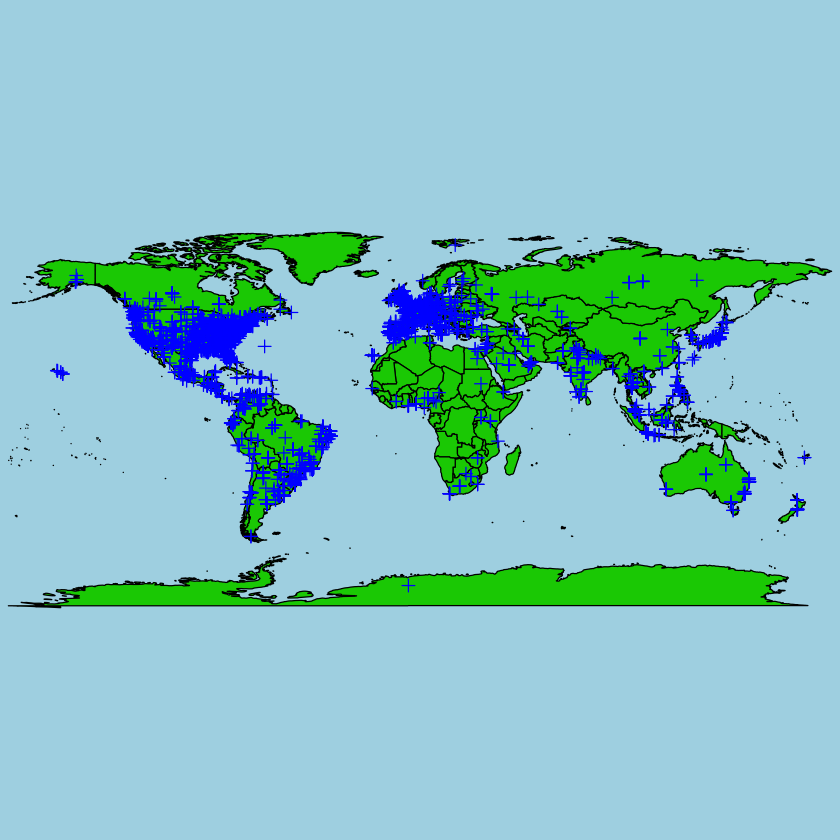

In [40]:
#Global Analysis
#source: R on Jupyter handout

dat.x <- dat$lon
dat.y <- dat$lat
map("world",fill=TRUE,col=3, bg="lightblue",mar=c(0,0,0,0))
points(dat.x,dat.y,col="blue",pch =3)

In [23]:
#conversion from geocodes to state codes in order to group locations by state
#source:  http://stackoverflow.com/questions/8751497/latitude-longitude-coordinates-to-state-code-in-r
library(maps)
library(sp)    
library(maptools)

#dat <- read.csv(file="/Users/arunchandrapendyala/Desktop/geolocdf4.csv",head=TRUE,sep=",") #use all the files for conversion


# The single argument to this function, pointsDF, is a data.frame in which:
#   - column 1 contains the longitude in degrees (negative in the US)
#   - column 2 contains the latitude in degrees

latlong2state <- function(pointsDF) {
    # Prepare SpatialPolygons object with one SpatialPolygon
    # per state (plus DC, minus HI & AK)
    states <- map('state', fill=TRUE, col="transparent", plot=FALSE)
    IDs <- sapply(strsplit(states$names, ":"), function(x) x[1])
    states_sp <- map2SpatialPolygons(states, IDs=IDs,
                     proj4string=CRS("+proj=longlat +datum=WGS84"))

    # Convert pointsDF to a SpatialPoints object 
    pointsSP <- SpatialPoints(pointsDF, 
                    proj4string=CRS("+proj=longlat +datum=WGS84"))

    # Use 'over' to get _indices_ of the Polygons object containing each point 
    indices <- over(pointsSP, states_sp)

    # Return the state names of the Polygons object containing each point
    stateNames <- sapply(states_sp@polygons, function(x) x@ID)
    stateNames[indices]
}

In [24]:
stateloc <- latlong2state(dat)


In [26]:
state <- table(stateloc)   #table is used to find grouping of states with corresponding frequencies
statedata <- as.data.frame(state)
statedata

stateloc,Freq
alabama,29
arizona,62
arkansas,9
california,363
colorado,49
connecticut,40
delaware,5
district of columbia,51
florida,144
georgia,92


In [42]:
#source: https://blog.dominodatalab.com/geographic-visualization-with-rs-ggmaps/
#Plot the USA map
usa_center = as.numeric(geocode("United States"))

USAMap = ggmap(get_googlemap(center=usa_center, scale=2, zoom=4), extent="normal")

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=37.09024,-95.712891&zoom=4&size=640x640&scale=2&maptype=terrain&sensor=false


In [43]:
for (i in 1:nrow(statedata)) {

  latlon = geocode(as.character(statedata[i,1]))  #determining the geocodes for the 50 states

  statedata$lon[i] = as.numeric(latlon[1])

  statedata$lat[i] = as.numeric(latlon[2])

}

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=alabama&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=arizona&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=arkansas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=california&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=colorado&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=connecticut&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=delaware&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=district%20of%20columbia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=florida&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geoco

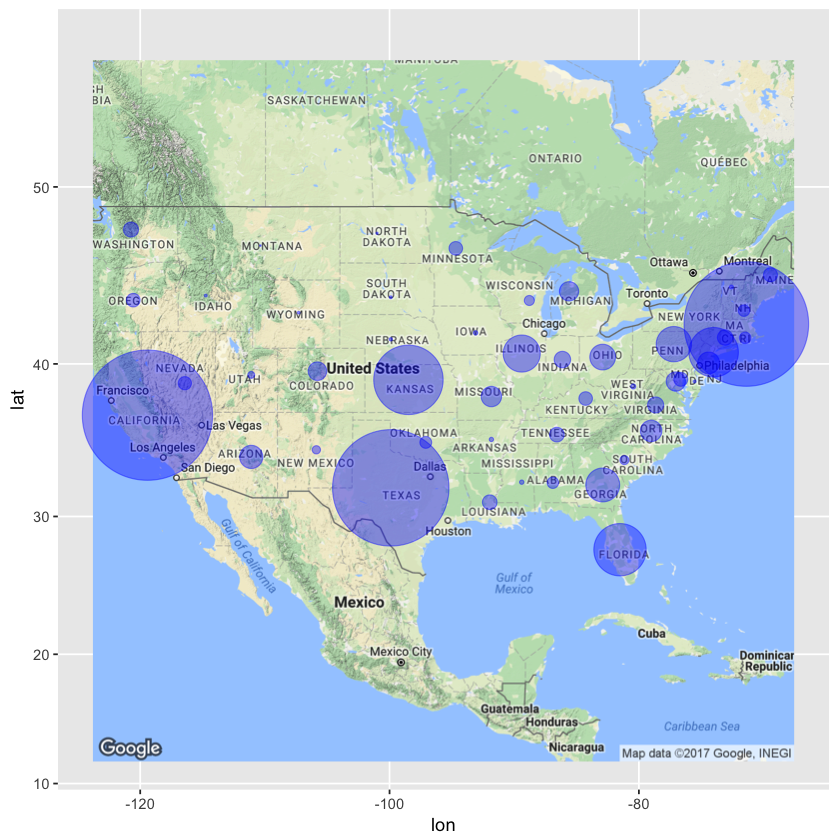

In [44]:
circle_scale_amt = 0.1
USAMap +geom_point(aes(x=lon, y=lat), data=statedata, col="blue", alpha=0.4, size=statedata$Freq*circle_scale_amt) + scale_size_continuous(range=range(statedata$Freq))
#the circle size displays the intensity
#TEXAS, CALIFORNIA , NEW YORK TWEETED THE MOST

In [3]:
#<-----------------PART-2- GENERALIZED CASE (with search variable)------------>
#NOTE: This part doesn't involve storing data in CSV and any search term can be used and n has been limited to 500

library('twitteR')
setup_twitter_oauth("AhfTjxlw3bMAJSx5LOzM0CfqT", "aixmj9xYpO3bLeTgcSuhLJLGZGchpkQYo6i8j85zejPKLLaXAj", "847585052-7ujhP4Gk68ybAxQUZ8UGuz3IZsxYwD7ihG9xbq0f", "pF4PXgUv1D6Gwl8ZDHN2UGv6TsJRY7a1YI3XkabDRIzlp")

searchterm <- "#grammys"       #insert the search term here such as #grammys which was used for testing PART-2
tweets <- searchTwitter(searchterm,n=500)   #n has been reduced to 500 considering API limits   
df1 <- twListToDF(tweets)
users.data <- lookupUsers(df1$screenName) #look up users from tweets dataframes
udata <- twListToDF(users.data)
locations <- udata$location  #extract the locations such as Los Angeles, CA

[1] "Using direct authentication"


In [5]:
loc_clean <- locations[locations!='']

In [6]:
library("ggmap")  
library("maptools")
library(maps)

geoloc1 <- geocode(loc_clean) #get the geocodes - latitudes and longitudes of the locations
geolocna <- na.omit(geoloc1)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Narnia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Deez%20Nuts,%20Texas,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dewey%20Beach,%20Delaware&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=#BlackLivesMatter&sensor=false
Warning message in readLines(connect, warn = FALSE):
“cannot open URL 'http://maps.googleapis.com/maps/api/geocode/json?address=#BlackLivesMatter&sensor=false': HTTP status was '400 Bad Request'”Warning message in FUN(X[[i]], ...):
“  geocoding failed for "#BlackLivesMatter".
  if accompanied by 500 Internal Server Error with using dsk, try google.”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston

In [7]:
library(maps)
library(sp)    
library(maptools)



latlong2state <- function(pointsDF) {
    
    states <- map('state', fill=TRUE, col="transparent", plot=FALSE)
    IDs <- sapply(strsplit(states$names, ":"), function(x) x[1])
    states_sp <- map2SpatialPolygons(states, IDs=IDs,
                     proj4string=CRS("+proj=longlat +datum=WGS84"))

    
    pointsSP <- SpatialPoints(pointsDF, 
                    proj4string=CRS("+proj=longlat +datum=WGS84"))

    indices <- over(pointsSP, states_sp)

    stateNames <- sapply(states_sp@polygons, function(x) x@ID)
    stateNames[indices]
}

In [8]:
stateloc <- latlong2state(geolocna)
state <- table(stateloc)   #table is used to find grouping of states with corresponding frequencies
statedata <- as.data.frame(state)

In [10]:
usa_center = as.numeric(geocode("United States"))

USAMap = ggmap(get_googlemap(center=usa_center, scale=2, zoom=4), extent="normal")

for (i in 1:nrow(statedata)) {

  latlon = geocode(as.character(statedata[i,1]))  #determining the geocodes for the 50 states

  statedata$lon[i] = as.numeric(latlon[1])

  statedata$lat[i] = as.numeric(latlon[2])

}


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=37.09024,-95.712891&zoom=4&size=640x640&scale=2&maptype=terrain&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=alabama&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=california&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=colorado&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=delaware&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=florida&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=georgia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=illinois&sensor=false
Information from URL : http://map

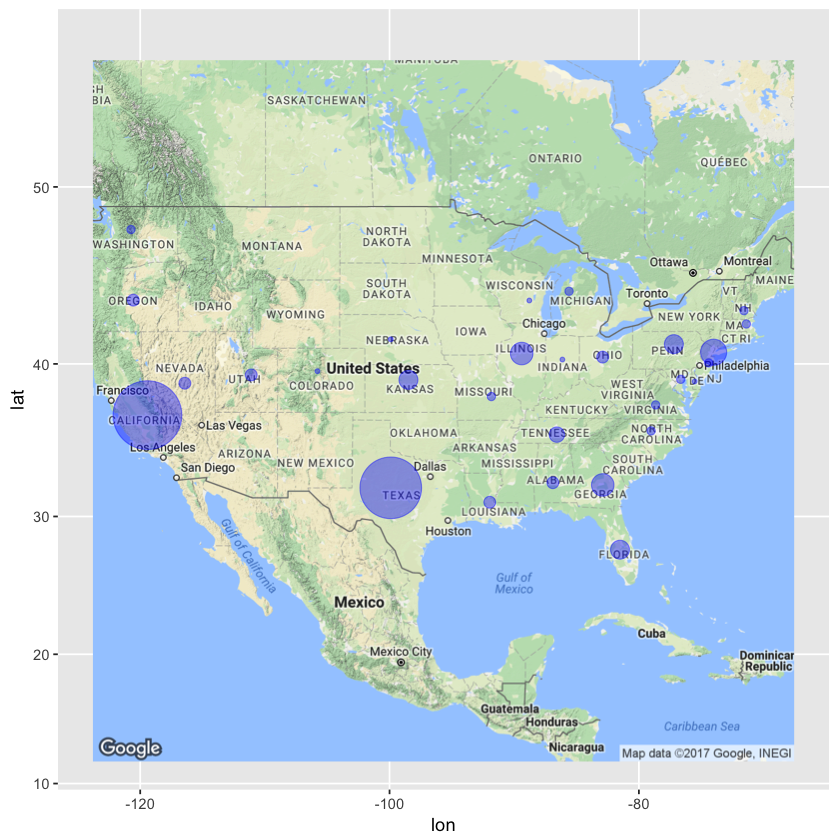

In [11]:
circle_scale_amt = 1
USAMap +geom_point(aes(x=lon, y=lat), data=statedata, col="blue", alpha=0.4, size=statedata$Freq*circle_scale_amt) + scale_size_continuous(range=range(statedata$Freq))
#the circle size displays the intensity